In [1]:
%pylab inline

from tools.issag import Sampler, _random_range_, _rejection_
from tools.issag import Models, iSSAG
import pandas as pd
import seaborn as sns
from scipy.stats import norm

sns.set(style="ticks")
#np.random.seed(sum(map(ord, "axis_grids")))

Populating the interactive namespace from numpy and matplotlib


/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'griddsize', 'label'
  s)
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages

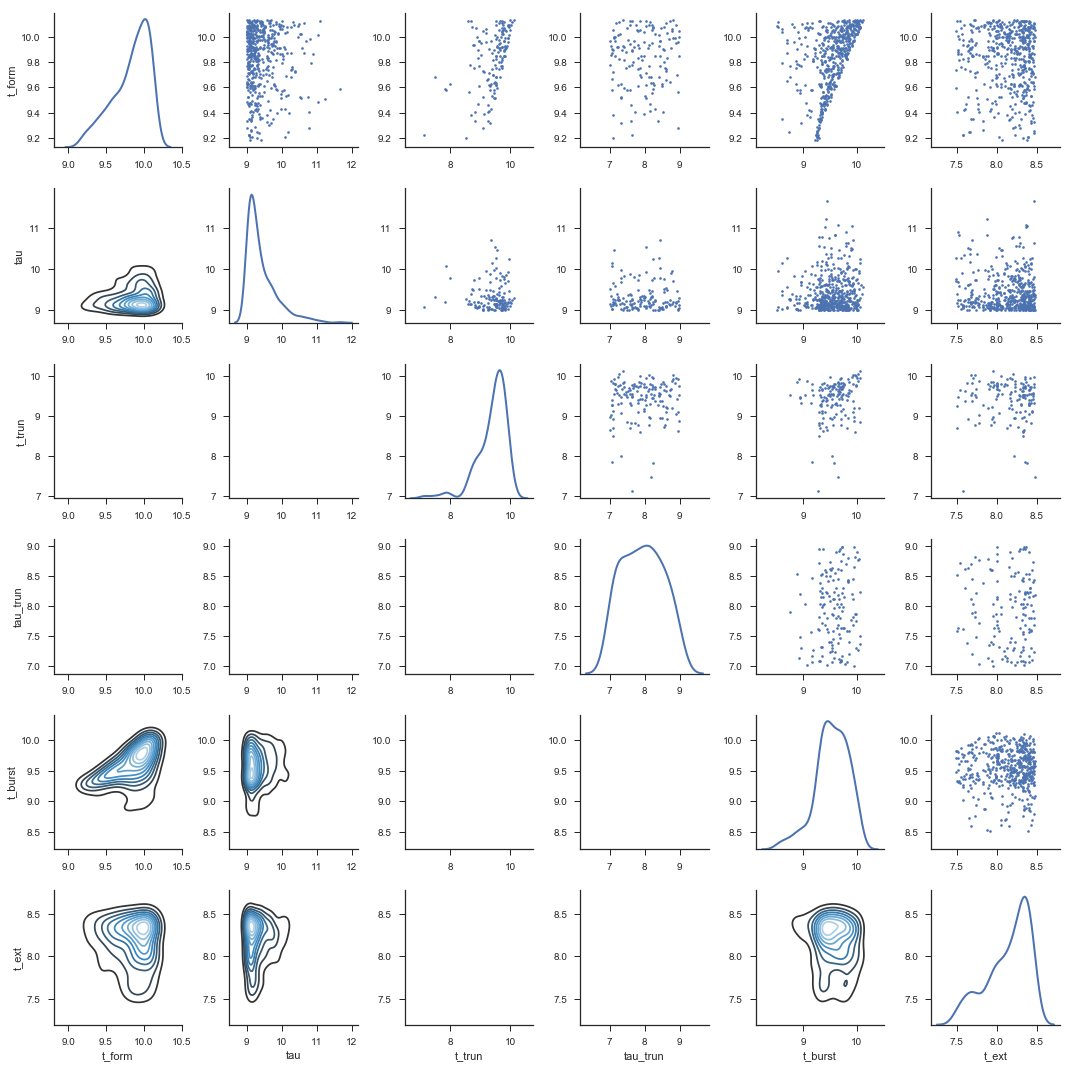

In [2]:
chen = Sampler()

sample = chen.get_samples(size=100)
sample = chen.get_samples(size=500, pristine=True)
sample.insert(loc=2, column="tau", value=1.0/sample.gamma*1e9)
columns = "t_form tau t_trun tau_trun t_burst t_ext".split()
sample[columns] = sample[columns].apply(log10)
sample.head(n=10)

g = sns.PairGrid(sample, vars=["t_form", "tau", "t_trun", "tau_trun", "t_burst", "t_ext"], diag_sharey=False, dropna=False)
g.map_upper(plt.scatter, **{"s": 7, "lw": 0})
g.map_lower(sns.kdeplot, cmap="Blues_d", **{"griddsize": 20, "bw": (0.1, 0.1)})
g.map_diag(sns.kdeplot, lw=2, legend=False)

In [3]:
%%time
library = iSSAG(size=10000)
library.set_all_SFHs()

CPU times: user 1min 47s, sys: 157 ms, total: 1min 47s
Wall time: 1min 48s


In [4]:
library.sample.head(n=20)

,t_form,gamma,truncated,t_trun,tau_trun,t_burst,t_ext,A,Z,tau_V,mu_V,sigma_v
0,1.138426e+10,0.942392,False,NaN,NaN,2.197533e+09,2.427968e+08,0.208359,0.790308,0.919535,0.454595,326.054689
1,1.846558e+09,0.539941,False,NaN,NaN,1.944272e+09,3.773018e+07,2.773586,0.843039,0.980669,0.723025,266.999814
2,1.227784e+10,0.851760,True,1.000909e+10,1.732769e+08,2.921878e+09,2.483897e+08,0.122825,0.461922,1.272807,0.527735,269.681332
3,8.016453e+09,0.655902,True,7.806119e+09,6.464236e+08,5.596264e+09,2.255160e+08,0.289481,0.787789,1.919412,0.608130,133.264565
4,7.137371e+09,0.015008,False,NaN,NaN,3.944462e+09,1.410341e+08,0.661453,0.449353,2.540509,0.113648,242.752625


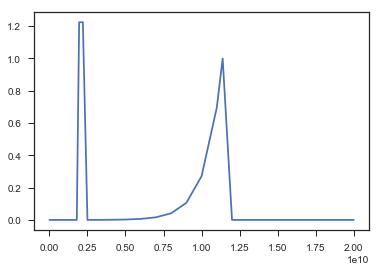

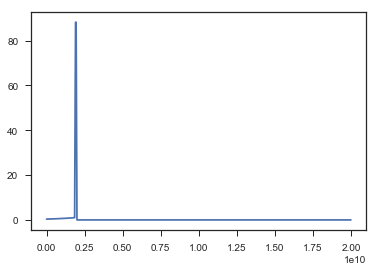

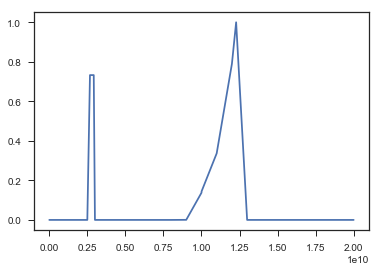

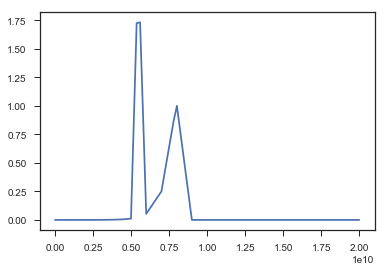

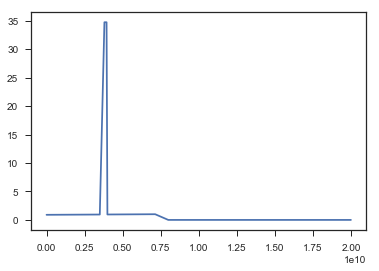

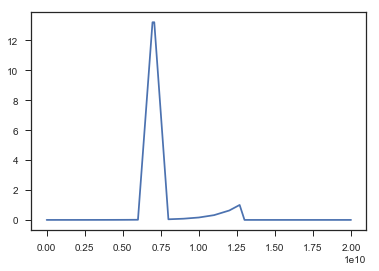

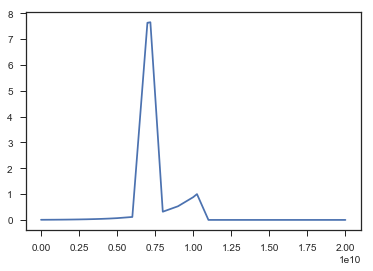

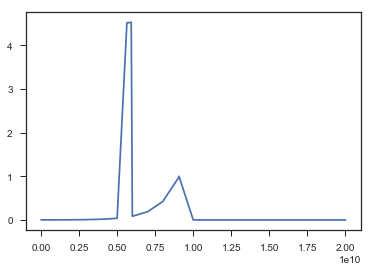

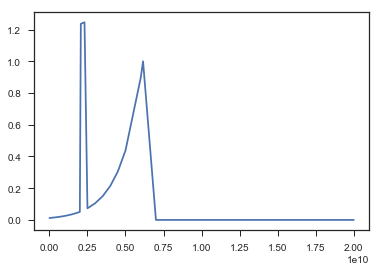

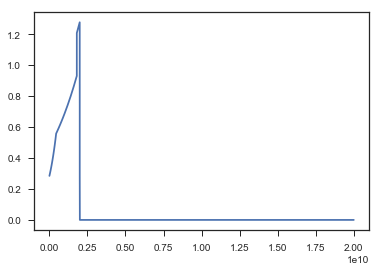

In [5]:
for i in xrange(10):
    mask = np.ones(library.SFHs[i].size, dtype=bool)#library.SFHs[i]>0.0#
#     print "---------------------------"
#     print library.SFHs[i][mask].head()
    figure()
    library.SFHs[i][mask].plot()